
Desain Kromosom dan Metode Pendekodean 

Pada Algoritma yang kami buat saat ini kami menggunakan representasi biner. Setiap GEN memiliki nilai 0 atau 1. dalam kromosom yang kami rancang memiliki panjang indeks 10, kami memilih 10 indeks di karena kan saat melakukan decode menghasilkan nilai x dan y yang bervariabel, dimana x menjadi 5 indeks dan y menjadi 5 indeks. kami sudah menguji juga bahwa setiap pendekodean tidak akan melebihi batasnya.


In [ ]:
import random
import math

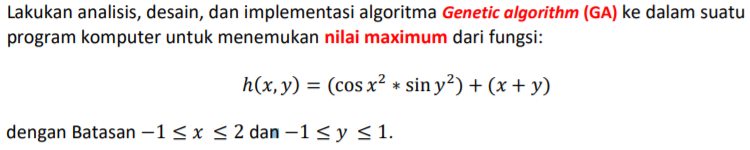

In [ ]:
# karenakan yang di cari nilai maksimum maka f = h
def fitness(x,y):
    return (math.cos(x*x) * math.sin(y*y) + (x+y))

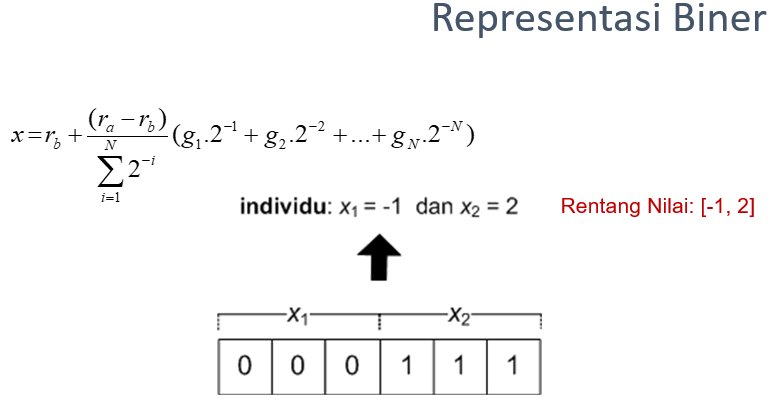

In [ ]:
# decode kromosom menggunakan representasi biner
def decode(kromosom):
    hasil = []
    # x
    hasil.append(-1 + ((2-(-1))/ (math.pow(2,-1)+math.pow(2,-2)+math.pow(2,-3)+math.pow(2,-4)+math.pow(2,-5))*( (kromosom[0]*math.pow(2,-1))+(kromosom[1]*math.pow(2,-2))+(kromosom[2]*math.pow(2,-3))+(kromosom[3]*math.pow(2,-4))+(kromosom[4]*math.pow(2,-5)))))
    # y
    hasil.append(-1 + ((1-(-1))/(math.pow(2,-1)+math.pow(2,-2)+math.pow(2,-3)+math.pow(2,-4)+math.pow(2,-5))*( (kromosom[5]*math.pow(2,-1))+(kromosom[6]*math.pow(2,-2))+(kromosom[7]*math.pow(2,-3))+(kromosom[8]*math.pow(2,-4))+(kromosom[9]*math.pow(2,-5)))))
    return hasil 

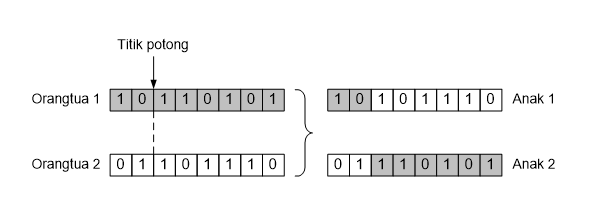

In [ ]:
#pindah silang orang tua untuk mendapatkan anak baru
def PindahSilang(ortu1, ortu2):
    anak1 = []
    anak2 = []
    n = random.randint(1,10)
    for i in range(n):
        anak1.append(ortu1[i]
        anak2.append(ortu2[i])
    while(n<10):
        anak1.append(ortu2[n])
        anak2.append(ortu1[n])
        n+=1
    return anak1, anak2


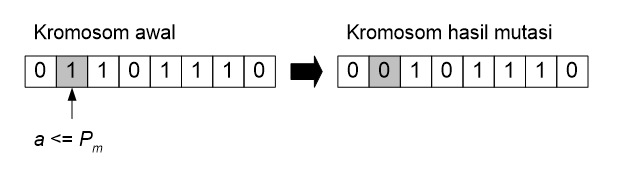

In [ ]:
#proses mutasi anak dengan probabilitas mutasi anak 10%
def mutasi(anak):
    anakC = anak[:]
    for i in range(10):
        n = random.uniform(0, 1)
        if (n < 0.1):
            if (anakC[i] == 0):
                anakC[i] = 1
            else:
                anakC[i] = 0
    return anakC

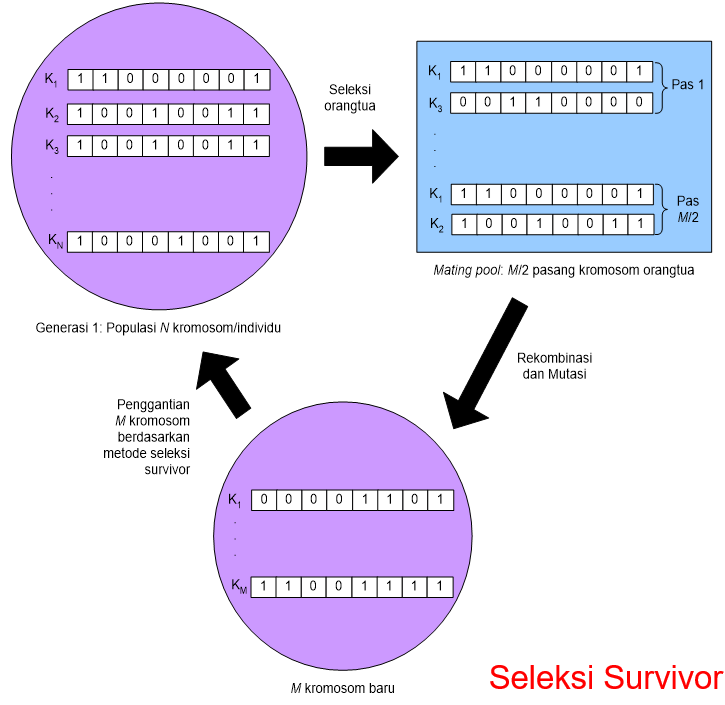

In [ ]:
# melakukan regenerasi dengan menganti 2 populasi paling buruk dari populasi lama
# dengan menggunakan populasi anak yang di dapatkan
# dari seleksi orang tua yang di crossover dan mutasi 
def Regenerasi(parentLama,parentBaru,Popfitness,Popf):
    indeks = CariIndeksMinfitness(Popf)
    idx = CariIndeksMaxfitness(Popfitness)
    parentLama[indeks] = parentBaru[idx]
    indeks2 = CariIndeksMinfitness(Popf)
    idx2 = CariIndeksMaxfitness(Popfitness)
    parentLama[indeks2] = parentBaru[idx2]
    return parentLama

In [ ]:
#random populasi
def buatpopulasiK(panjang):
    populasi = []
    for i in range(panjang):
        kromosom = []
        for j in range(10):
            kromosom.append(random.randint(0, 1))
        populasi.append(kromosom)
    return populasi

In [ ]:
#buat populasi fitness dari Populasi
def PopulasiFitness(populasi):
    PopulasiFitness = []
    for i in range(len(populasi)):
        k = decode(populasi[i])
        PopulasiFitness.insert(i,fitness(k[0],k[1]))
    return PopulasiFitness

In [ ]:
# seleksi orang tua dengan metode tournamen
# mengambil 1/2 dari total populasi terderendah berdasarkan fitness
def tour(populasi,fitness):
    pop = populasi[:]
    fit = fitness[:] 
    parent = []
    for i in range(len(fit)): 
        min_idx = i 
        for j in range(i+1, len(fit)): 
            if fit[min_idx] > fit[j]: 
                min_idx = j        
        fit[i], fit[min_idx] = fit[min_idx], fit[i]
        pop[i], pop[min_idx] = pop[min_idx], pop[i]
    for i in range(uk_populasi // 2):
        parent.append(pop[i])
    return parent

In [ ]:
# untuk mencari indeks minimum dari populasi fitness
def CariIndeksMinfitness(Popfitness):
    indeks = 0
    for i in range(len(Popfitness) ):
        if (Popfitness[i] < Popfitness[indeks]):
            indeks = i
    return indeks

In [ ]:
# untuk mencari indeks maksimum dari populasi fitness
def CariIndeksMaxfitness(fitness):
    indeks = 0
    for i in range(len(fitness)):
        if (fitness[i] > fitness[indeks]):
            indeks = i
    return indeks

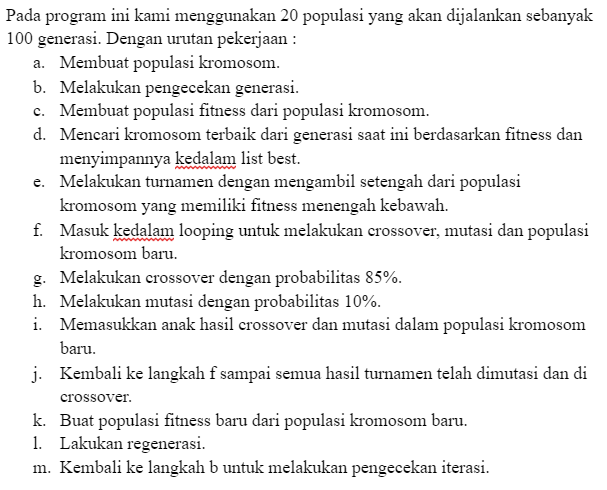

In [ ]:
#Program Utama
#ukuran generasi atau jumlah generasi
uk_gen = 100
uk_populasi = 20
#membuat list populasi
populasi = buatpopulasiK(uk_populasi)
#tempat populasi
Pfit = []
best = []
#program main untuk mencari kromosom terbaik dari suatu gen
for i in range(uk_gen):
    #variable populasi baru
    new_p = []
    nfit = []
    #membuat popupilasi 
    Pfit = PopulasiFitness(populasi)
    #variable untuk menghitung saat melakukan meeting pool
    j = 0
    #mencari kromosom terbaik dari generasi saat ini
    indeks = CariIndeksMaxfitness(Pfit)
    #mendecode kromosom terbaik
    x = decode(populasi[indeks])
    #membuat nilai fitness dari kromosom terbaik
    nilai = fitness(x[0],x[1])

    #membuat parent untuk tournamen dan meeting pool 
    #mengambil 1/2 dari jumlah populasi
    parent = tour(populasi,Pfit)
    best.append(nilai)
    #meeting pool
    while (j < (uk_populasi // 2)):
        #probabilitas crosover
        if (random.uniform(0,1)<0.85):
          #crossover
          child0,child1 = PindahSilang(parent[j],parent[j+1])
          #mutasi
          child0 = mutasi(child0)
          child1 = mutasi(child1)
          new_p.append(child0)
          new_p.append(child1)
        j = j + 2
    #regenerasi
    nfit = PopulasiFitness(new_p)
    populasi = Regenerasi(populasi,new_p,nfit,Pfit)

indeks = CariIndeksMaxfitness(Pfit)
x = decode(populasi[indeks])
nilai = fitness(x[0],x[1])
print("==================================")
print("Kromosom terbaik : ",populasi[indeks])
print("Nilai x  : ",x[0])
print("Nilai y  : ",x[1])
print("Fitnes   : ",nilai)
print("==================================")

Kromosom terbaik :  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
Nilai x  :  0.8387096774193548
Nilai y  :  1.0
Fitnes   :  2.4804368980667126


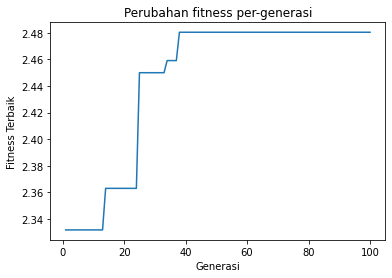

In [ ]:
import matplotlib.pyplot as plt

# lihat pertumbuhan fitness terbaik
plt.plot(range(1, uk_gen + 1), best)
plt.title("Perubahan fitness per-generasi")
plt.xlabel("Generasi")
plt.ylabel("Fitness Terbaik")
plt.show()